In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("List of Countries by Sugarcane Production.csv")
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [2]:
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Country                     103 non-null    object
 1   Continent                   103 non-null    object
 2   Production (Tons)           103 non-null    object
 3   Production per Person (Kg)  103 non-null    object
 4   Acreage (Hectare)           102 non-null    object
 5   Yield (Kg / Hectare)        102 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [4]:
# in Production (Tons) - it contains two decimals ,which is not possible in single numbers 
# so remove the decimals
df['Production (Tons)'] = df['Production (Tons)'].str.replace('.','')

In [5]:
# GIven :  commas , for decimals:
# So replace the (,)with . in all the columns. and remove the (.)
df["Production per Person (Kg)"].str.replace(".","")

0      3668,531
1        260721
2         88287
3      1264,303
4        324219
         ...   
98           16
99           51
100           9
101           6
102           0
Name: Production per Person (Kg), Length: 103, dtype: object

In [6]:
df['Production per Person (Kg)'] = df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10.226.205,"75.167,5"
1,India,Asia,348448000,260721,4.950.000,"70.393,5"
2,China,Asia,123059739,88287,1.675.215,"73.459,1"
3,Thailand,Asia,87468496,1264.303,1.336.575,"65.442,2"
4,Pakistan,Asia,65450704,324219,1.130.820,57.879


In [7]:
df['Acreage (Hectare)'] = df['Acreage (Hectare)'].str.replace('.', '')
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10226205,"75.167,5"
1,India,Asia,348448000,260721,4950000,"70.393,5"
2,China,Asia,123059739,88287,1675215,"73.459,1"
3,Thailand,Asia,87468496,1264.303,1336575,"65.442,2"
4,Pakistan,Asia,65450704,324219,1130820,57.879


In [8]:
df['Yield (Kg / Hectare)'] = df['Yield (Kg / Hectare)'].str.replace('.', '').str.replace(',', '.')
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [9]:
# Observe that the Columns name having some spaces in between and rename, lets remove it
df.rename(columns=
    {
        'Production (Tons)': 'Production_Tons',
        'Production per Person (Kg)': 'Production_per_Person_Kg',
        'Acreage (Hectare)': 'Acreage_Hectare',
        'Yield (Kg / Hectare)': 'Yield_Kg/Hectare'
    },
    inplace=True
)
df.head()

,Country,Continent,Production_Tons,Production_per_Person_Kg,Acreage_Hectare,Yield_Kg/Hectare
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [10]:
# Check For The Null Values
df.isnull().sum()

Country                     0
Continent                   0
Production_Tons             0
Production_per_Person_Kg    0
Acreage_Hectare             1
Yield_Kg/Hectare            1
dtype: int64

In [11]:
df[df.Acreage_Hectare.isnull()]

,Country,Continent,Production_Tons,Production_per_Person_Kg,Acreage_Hectare,Yield_Kg/Hectare
99,Djibouti,Africa,53,51,NaN,NaN


In [12]:
# df.drop(index = 99, inplace=True)
# df.dropna(inplace=True)

In [13]:
# But this indexes are not now in proper manner now
# so we need to reset them 
df.head(100)

,Country,Continent,Production_Tons,Production_per_Person_Kg,Acreage_Hectare,Yield_Kg/Hectare
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...
95,Oman,Asia,1186,237,51,23432.2
96,Yemen,Asia,500,17,50,10
97,Spain,Europe,394,8,9,43596.5
98,Lebanon,Asia,97,16,3,28386.4


In [14]:
# df.dropna(inplace=True).reset_index() --> ERROR: NoneType
# df.dropna() creates a new DataFrame (does NOT change df)
df.dropna().reset_index(inplace=True)
df.head(100)

,Country,Continent,Production_Tons,Production_per_Person_Kg,Acreage_Hectare,Yield_Kg/Hectare
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...
95,Oman,Asia,1186,237,51,23432.2
96,Yemen,Asia,500,17,50,10
97,Spain,Europe,394,8,9,43596.5
98,Lebanon,Asia,97,16,3,28386.4


In [15]:
# df = df.dropna().reset_index()
# But it creates a another column for the index
df = df.dropna().reset_index(drop=True)
df.head()

,Country,Continent,Production_Tons,Production_per_Person_Kg,Acreage_Hectare,Yield_Kg/Hectare
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Country                   102 non-null    object
 1   Continent                 102 non-null    object
 2   Production_Tons           102 non-null    object
 3   Production_per_Person_Kg  102 non-null    object
 4   Acreage_Hectare           102 non-null    object
 5   Yield_Kg/Hectare          102 non-null    object
dtypes: object(6)
memory usage: 4.9+ KB


In [17]:
df.columns

Index(['Country', 'Continent', 'Production_Tons', 'Production_per_Person_Kg',
       'Acreage_Hectare', 'Yield_Kg/Hectare'],
      dtype='object')

In [18]:
for i in df.columns[2:]:
    df[i] = df[i].astype('float')

In [19]:
df.dtypes

Country                      object
Continent                    object
Production_Tons             float64
Production_per_Person_Kg    float64
Acreage_Hectare             float64
Yield_Kg/Hectare            float64
dtype: object

In [20]:
# Checking for the duplicated values
df.duplicated().sum()

np.int64(0)

In [21]:
# Checking for the no. of Unique values in each column
df.nunique()

Country                     102
Continent                     6
Production_Tons             102
Production_per_Person_Kg    101
Acreage_Hectare             101
Yield_Kg/Hectare            102
dtype: int64

**Univariate Analysis - Single variable column analysis**

**Bivariate Analysis - Two variable column analysis**

**Multivariate Analysis - More than two variable column analysis**

---

#### **Univariate Analysis - Single variable column analysis**

In [22]:
df.head()

,Country,Continent,Production_Tons,Production_per_Person_Kg,Acreage_Hectare,Yield_Kg/Hectare
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


**How Many Countries Produce Sugarcane From Each Continent?**

In [23]:
cont = df.Continent.value_counts()
cont

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

In [24]:
cont

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

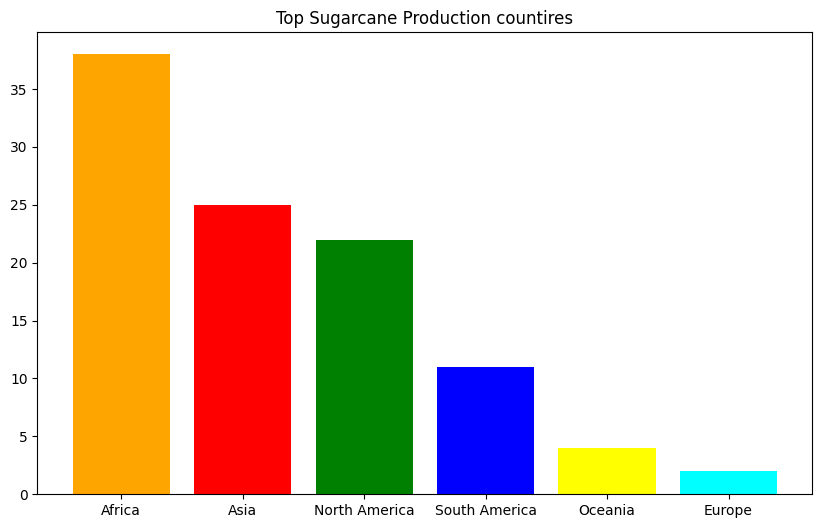

In [25]:
plt.figure(figsize=(10, 6))
plt.title('Top Sugarcane Production countires')
plt.bar(cont.keys(), cont, color = ['orange', 'red', 'green', 'blue', 'yellow', 'cyan'])
plt.show()

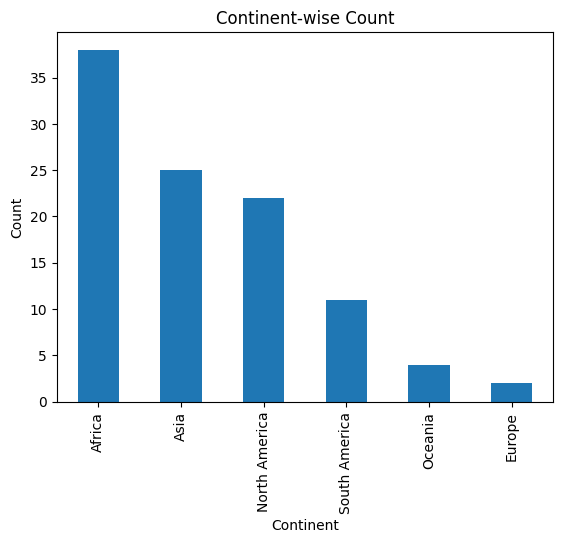

In [26]:
# Second way

df.Continent.value_counts().plot(kind='bar')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.title('Continent-wise Count')
plt.show()

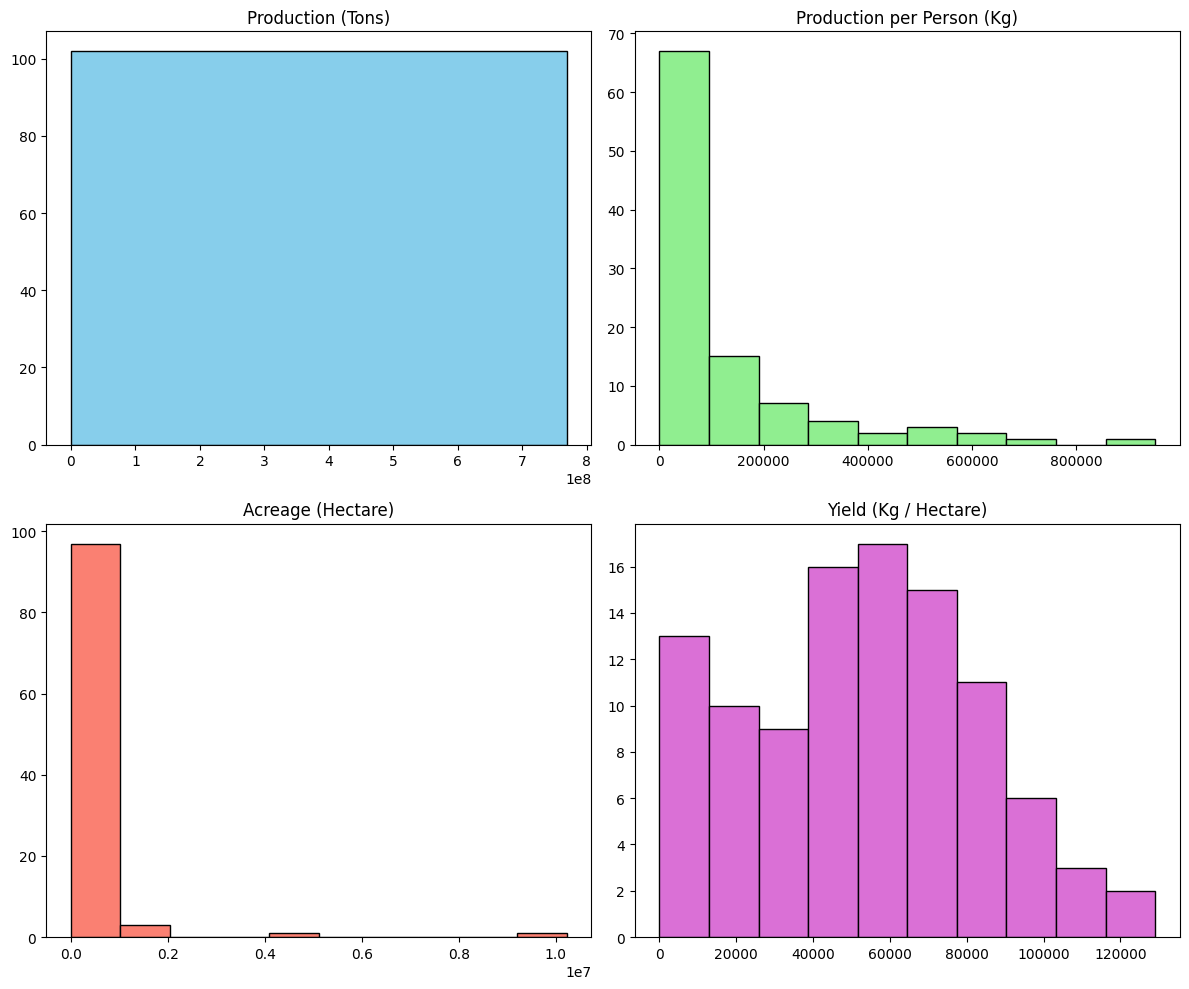

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# It helps understand the data distribution clearly.
# Example:
# bins=5 → fewer, wider bars (less detail)
# bins=10 → balanced view (commonly used)
# bins=20 → more detail, but can look crowded

axes[0, 0].hist(df["Production_Tons"], bins=1, color='skyblue', edgecolor='black')
axes[0, 0].set_title("Production (Tons)")

axes[0, 1].hist(df["Production_per_Person_Kg"], bins=10, color='lightgreen', edgecolor='black')
axes[0, 1].set_title("Production per Person (Kg)")

axes[1, 0].hist(df["Acreage_Hectare"], bins=10, color='salmon', edgecolor='black')
axes[1, 0].set_title("Acreage (Hectare)")

axes[1, 1].hist(df["Yield_Kg/Hectare"], bins=10, color='orchid', edgecolor='black')
axes[1, 1].set_title("Yield (Kg / Hectare)")

# It automatically adjusts spacing between subplots.
# Prevents overlapping of titles, labels, and axes.
plt.tight_layout()
plt.show()

#### **Bivariate Analysis - Two variable column analysis**

**Which Country produces Maximum Sugarcane?**

In [28]:
df.head()

,Country,Continent,Production_Tons,Production_per_Person_Kg,Acreage_Hectare,Yield_Kg/Hectare
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [29]:
df.loc[df['Production_Tons'].idxmax(), 'Country']

'Brazil'

In [30]:
# : → selects all rows
# ["Country", "Production(Tons)"] → selects only these two columns
new_df = df.loc[:, ["Country", "Production_Tons"]].sort_values(by="Production_Tons", ascending=False)
new_df.head()

,Country,Production_Tons
0,Brazil,768678382.0
1,India,348448000.0
2,China,123059739.0
3,Thailand,87468496.0
4,Pakistan,65450704.0


**Brazil produces maximum sugarcane**

#### **Top 5 Maximum Sugar Production Countries %**

In [31]:
new_df["Production(Tons)_Percentage"] = (new_df["Production_Tons"]*100)/sum(new_df["Production_Tons"])
new_df.head()

,Country,Production_Tons,Production(Tons)_Percentage
0,Brazil,768678382.0,40.727285
1,India,348448000.0,18.462001
2,China,123059739.0,6.520138
3,Thailand,87468496.0,4.634389
4,Pakistan,65450704.0,3.467809


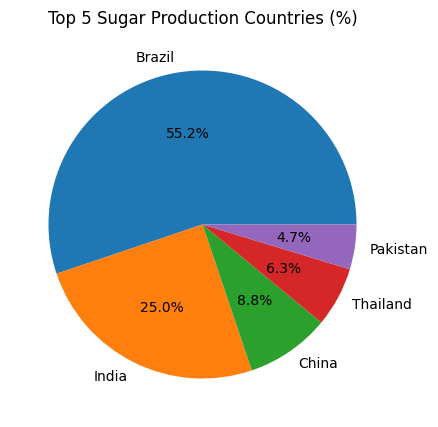

In [32]:
import matplotlib.pyplot as plt

top5 = new_df.head(5)

plt.figure(figsize=(8, 5))
plt.pie(
    top5['Production(Tons)_Percentage'],
    labels=top5['Country'],
    autopct='%0.1f%%' # -->shows percentage values
)
plt.title('Top 5 Sugar Production Countries (%)')
plt.show()

#### **Which Country Has the Highest Land**

In [33]:
df.head()

,Country,Continent,Production_Tons,Production_per_Person_Kg,Acreage_Hectare,Yield_Kg/Hectare
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [34]:

new_df = df.loc[:,["Country","Acreage_Hectare"]].sort_values(by="Acreage_Hectare",ascending=False).set_index('Country')
new_df.head(10)

,Acreage_Hectare
Country,
Brazil,10226205.0
India,4950000.0
China,1675215.0
Thailand,1336575.0
Pakistan,1130820.0
Mexico,781054.0
Indonesia,472693.0
Australia,447204.0
Cuba,442307.0


<Axes: xlabel='Country'>

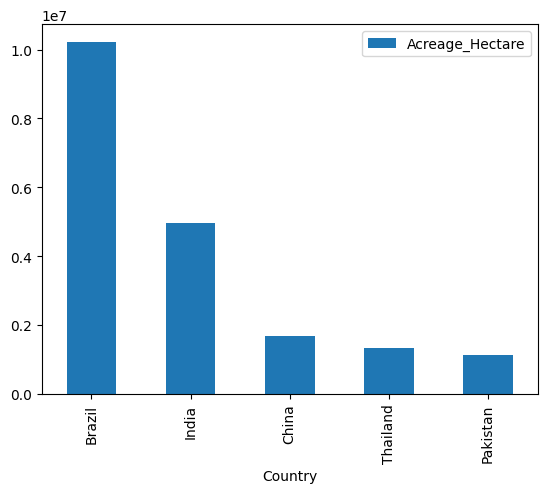

In [35]:
new_df.head().plot(kind='bar')

#### **Which top 10 Country has the Highest Yield Per kg hectare(kg/hect)**

In [36]:
df.head()

,Country,Continent,Production_Tons,Production_per_Person_Kg,Acreage_Hectare,Yield_Kg/Hectare
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [37]:
new_df=df.loc[:,["Country","Yield_Kg/Hectare"]].set_index("Country")
new_df.head()

,Yield_Kg/Hectare
Country,
Brazil,75167.5
India,70393.5
China,73459.1
Thailand,65442.2
Pakistan,57879.0


In [38]:
top10_Yield = new_df.sort_values(by='Yield_Kg/Hectare', ascending=False).head(10)
top10_Yield

,Yield_Kg/Hectare
Country,
Guatemala,129049.3
Senegal,118085.3
Egypt,115030.6
Peru,112120.2
Malawi,107629.5
Chad,102867.1
Zambia,102789.6
Burkina Faso,100526.3
Swaziland,96511.4


<Axes: title={'center': 'Top 10 Countries by Yield(kg/Hect)'}, xlabel='Country'>

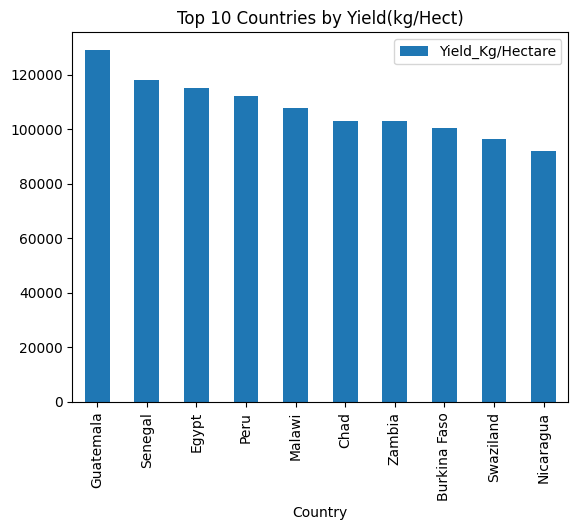

In [39]:
top10_Yield.plot(kind='bar', title='Top 10 Countries by Yield(kg/Hect)')

In [40]:
df.head(2)

,Country,Continent,Production_Tons,Production_per_Person_Kg,Acreage_Hectare,Yield_Kg/Hectare
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5


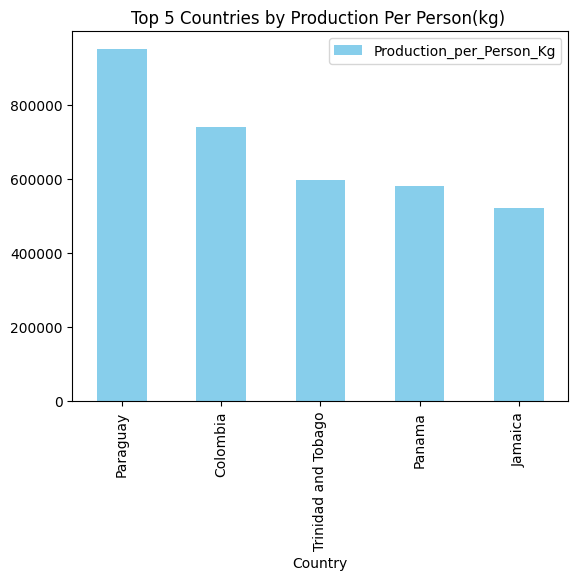

In [41]:
ax=df.loc[:,["Country","Production_per_Person_Kg"]].set_index("Country").sort_values(by="Production_per_Person_Kg",ascending=False).head().plot(
    kind='bar',
    title="Top 5 Countries by Production Per Person(kg) ",
    color='skyblue')

#### **Correlation**

In [42]:
df.head()

,Country,Continent,Production_Tons,Production_per_Person_Kg,Acreage_Hectare,Yield_Kg/Hectare
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [43]:
new_df = df.select_dtypes(include="number")
new_df.head()

,Production_Tons,Production_per_Person_Kg,Acreage_Hectare,Yield_Kg/Hectare
0,768678382.0,3668.531,10226205.0,75167.5
1,348448000.0,260721.000,4950000.0,70393.5
2,123059739.0,88287.000,1675215.0,73459.1
3,87468496.0,1264.303,1336575.0,65442.2
4,65450704.0,324219.000,1130820.0,57879.0


In [44]:
new_df.corr()

,Production_Tons,Production_per_Person_Kg,Acreage_Hectare,Yield_Kg/Hectare
Production_Tons,1.000000,0.015000,0.997550,0.132812
Production_per_Person_Kg,0.015000,1.000000,0.012557,0.017999
Acreage_Hectare,0.997550,0.012557,1.000000,0.113433
Yield_Kg/Hectare,0.132812,0.017999,0.113433,1.000000


In [45]:
corr = new_df.corr() * 100 # ->Make it %
corr.head()

,Production_Tons,Production_per_Person_Kg,Acreage_Hectare,Yield_Kg/Hectare
Production_Tons,100.000000,1.499996,99.755016,13.281219
Production_per_Person_Kg,1.499996,100.000000,1.255741,1.799875
Acreage_Hectare,99.755016,1.255741,100.000000,11.343282
Yield_Kg/Hectare,13.281219,1.799875,11.343282,100.000000


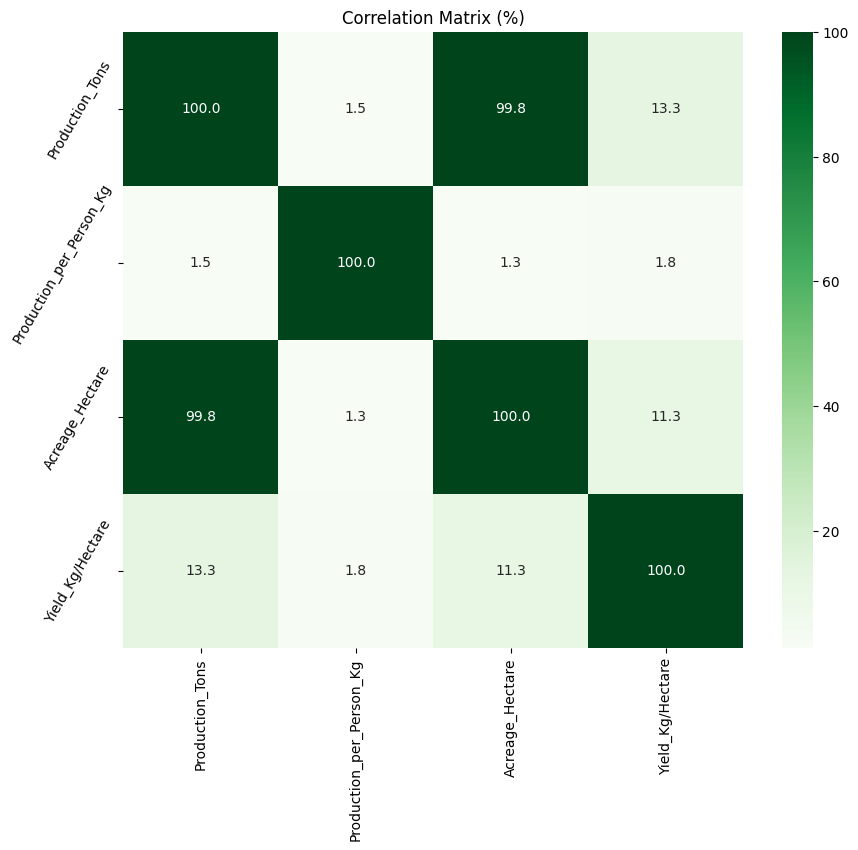

In [46]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="Greens", fmt=".1f")
plt.title("Correlation Matrix (%)")
plt.xticks(rotation=90)
plt.yticks(rotation=60)
plt.show()


**From Above Data Summary :**

- Production(Tons) and Acerage(Hectare ) they are Perfectly correlated

- there are other correlations but are not much effective.

#### **Do Countries With Higher Land Produce More Sugar ?**

Text(0.5, 1.0, 'Production of Sugar on Acreage Hectare')

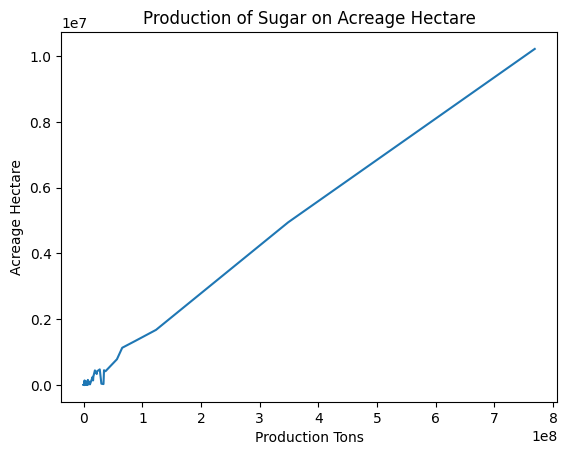

In [47]:
plt.plot(df["Production_Tons"],df["Acreage_Hectare"])
plt.xlabel('Production Tons')
plt.ylabel('Acreage Hectare')
plt.title('Production of Sugar on Acreage Hectare')

#### **Do Countries which Yeild More Sugar per hectare produces more sugar in total?**

#### **Which Continent Produces Maximum Sugar?**

In [48]:
df.head()

,Country,Continent,Production_Tons,Production_per_Person_Kg,Acreage_Hectare,Yield_Kg/Hectare
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [49]:
Max_Continent_Sugar = df[df['Production_Tons'] == df['Production_Tons'].max()].Continent[0]
Max_Continent_Sugar

'South America'

#### **Top 3 Continents Per highest Sugar ProductionTop 3 Continents Per highest Sugar Production**

In [50]:
top3 = df.groupby('Continent')['Production_Tons'].sum().sort_values(ascending=False).head(3)
top3

Continent
South America    865588126.0
Asia             721930425.0
North America    173995947.0
Name: Production_Tons, dtype: float64

<Axes: ylabel='Production_Tons'>

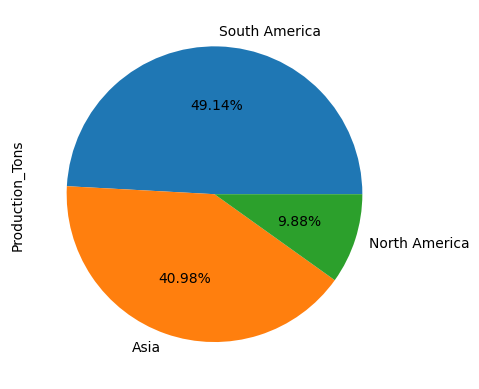

In [51]:
top3.plot(kind='pie', autopct = '%.2f%%')

### **Conclusion**

- Brazil is the largest producer of sugarcane in the dataset.

- India comes second in total production.

- South America produces the most sugar overall, followed by Asia.

- Countries with more land usually produce more sugarcane.

- higher yield depends on farming methods, not just land size.

In [52]:
df.to_csv('data_eda_done.csv', index=False)